# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


## Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

The first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot, add a sentence or two explaining what the code is analyzing.

The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1




print('Generating Data')
print('--------------------')
base_url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Generating Data
--------------------
Processing Record 1 of Set 1 : socorro
Processing Record 2 of Set 1 : arraial do cabo
Processing Record 3 of Set 1 : hermanus
City not found. Skipping...
Processing Record 4 of Set 1 : hobart
Processing Record 5 of Set 1 : hasaki
Processing Record 6 of Set 1 : albany
Processing Record 7 of Set 1 : saint-philippe
Processing Record 8 of Set 1 : tasiilaq
Processing Record 9 of Set 1 : mataura
Processing Record 10 of Set 1 : longhua
Processing Record 11 of Set 1 : te anau
Processing Record 12 of Set 1 : puerto madryn
Processing Record 13 of Set 1 : yazman
Processing Record 14 of Set 1 : vila
Processing Record 15 of Set 1 : mar del plata
Processing Record 16 of Set 1 : airai
Processing Record 17 of Set 1 : punta arenas
Processing Record 18 of Set 1 : viedma
Processing Record 19 of Set 1 : saskylakh
Processing Record 20 of Set 1 : sagar
Processing Record 21 of Set 1 : byron bay
City not found. Skipping...
Processing Record 22 of Set 1 : pevek
Processing R

Processing Record 34 of Set 4 : sebring
Processing Record 35 of Set 4 : khasan
Processing Record 36 of Set 4 : parry sound
Processing Record 37 of Set 4 : moranbah
Processing Record 38 of Set 4 : beloha
Processing Record 39 of Set 4 : pemba
Processing Record 40 of Set 4 : dikson
City not found. Skipping...
Processing Record 41 of Set 4 : darhan
Processing Record 42 of Set 4 : batabano
Processing Record 43 of Set 4 : monte patria
Processing Record 44 of Set 4 : eyl
Processing Record 45 of Set 4 : beyneu
Processing Record 46 of Set 4 : kodiak
Processing Record 47 of Set 4 : den helder
Processing Record 48 of Set 4 : aksu
Processing Record 49 of Set 4 : lebu
Processing Record 50 of Set 4 : upernavik
Processing Record 0 of Set 5 : saldanha
Processing Record 1 of Set 5 : wageningen
Processing Record 2 of Set 5 : rurrenabaque
Processing Record 3 of Set 5 : shubarkuduk
Processing Record 4 of Set 5 : sorland
Processing Record 5 of Set 5 : mount gambier
Processing Record 6 of Set 5 : the pas
Pr

Processing Record 24 of Set 8 : revelstoke
Processing Record 25 of Set 8 : qaqortoq
Processing Record 26 of Set 8 : darmanesti
Processing Record 27 of Set 8 : chapais
Processing Record 28 of Set 8 : sol-iletsk
Processing Record 29 of Set 8 : plouzane
City not found. Skipping...
Processing Record 30 of Set 8 : kieta
City not found. Skipping...
Processing Record 31 of Set 8 : san cristobal
Processing Record 32 of Set 8 : gamba
Processing Record 33 of Set 8 : rio verde de mato grosso
Processing Record 34 of Set 8 : sattur
Processing Record 35 of Set 8 : rocha
Processing Record 36 of Set 8 : brae
Processing Record 37 of Set 8 : bethanien
City not found. Skipping...
Processing Record 38 of Set 8 : sokoni
Processing Record 39 of Set 8 : tahe
Processing Record 40 of Set 8 : cherskiy
Processing Record 41 of Set 8 : shkotovo
City not found. Skipping...
Processing Record 42 of Set 8 : grindavik
Processing Record 43 of Set 8 : baiquan
Processing Record 44 of Set 8 : gabrovo
Processing Record 45 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# data frame for analysis
weather_data = pd.DataFrame({"City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list})

weather_data.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [5]:
# data check
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Socorro,1,US,1619294101,14,31.6546,-106.3033,80.01,3.44
1,Arraial do Cabo,20,BR,1619294272,73,-22.9661,-42.0278,78.80,12.66
2,Hermanus,100,ZA,1619294052,80,-34.4187,19.2345,63.00,5.01
3,Hobart,99,AU,1619294042,76,-42.8794,147.3294,50.00,11.50
4,Hasaki,20,JP,1619294273,93,35.7333,140.8333,46.40,4.61
...,...,...,...,...,...,...,...,...,...
532,Priboj,0,BA,1619294433,57,44.6028,18.9314,48.20,2.30
533,Woodward,1,US,1619294399,36,36.4337,-99.3904,66.20,4.61
534,Nantucket,1,US,1619294433,62,41.2835,-70.0995,55.40,19.57
535,Samarai,65,PG,1619294434,78,-10.6167,150.6667,82.47,14.41


In [6]:
# convert to csv file for analysis
weather_data.to_csv("weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data.sort_values(by=['Humidity'], ascending=False)

# THERE ARE NO CITIES THAT HAVE HUMIDITY > 100%


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
29,Vaini,40,TO,1619294279,100,-21.2000,-175.2000,71.60,1.14
191,Pemba,90,MZ,1619294326,100,-12.9740,40.5178,75.20,8.05
304,Kaduy,90,RU,1619294359,100,59.2000,37.1500,37.40,8.95
217,Wattegama,20,LK,1619294334,100,6.7989,81.4808,77.00,2.30
72,Alyangula,99,AU,1619294293,100,-13.8483,136.4192,69.80,9.80
...,...,...,...,...,...,...,...,...,...
156,Bilma,2,NE,1619294316,10,18.6853,12.9164,92.23,9.82
342,Jatāra,99,IN,1619294370,10,25.0167,79.0500,82.72,6.11
436,Ojinaga,1,MX,1619294399,9,29.5667,-104.4167,82.40,8.05
19,Saugor,99,IN,1619294277,9,23.8333,78.7167,82.17,4.50


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This chart clearly demonstrates that the closer to the equator, the higher the temperature, and the temperature decreases as we move farther away.


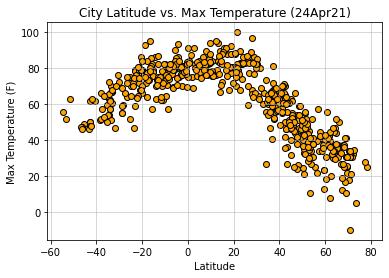

In [8]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "orange", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (24Apr21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

print("This chart clearly demonstrates that the closer to the equator, the higher the temperature, and the temperature decreases as we move farther away.")

## Latitude vs. Humidity Plot

Looking at this graph, there seems to be no true correlation between humidity and latitude.


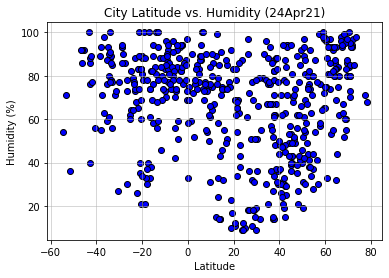

In [9]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (24Apr21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

print("Looking at this graph, there seems to be no true correlation between humidity and latitude.")

## Latitude vs. Cloudiness Plot

There is no direct correlation between cloudiness and location. Cloudiness seems to vary greatly across latitudes.


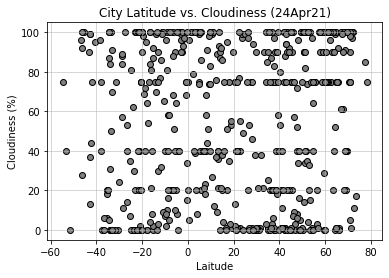

In [10]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "grey", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (24Apr21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

print("There is no direct correlation between cloudiness and location. Cloudiness seems to vary greatly across latitudes.")

## Latitude vs. Wind Speed Plot

Windspeed does not vary greatly across latitude. There is no direct correlation.


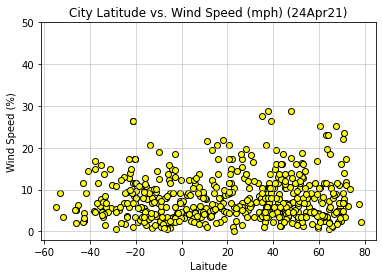

In [11]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "yellow", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (24Apr21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

print("Windspeed does not vary greatly across latitude. There is no direct correlation.")

## Linear Regression

In [24]:
# Create Northern and Southern Hemisphere DataFrames
n_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
s_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

#repeatable functions
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88
There is a strong negative correlation between teperature and latitude in the Northern Hemisphere. The farther away fron the equator, the colder it becomes.


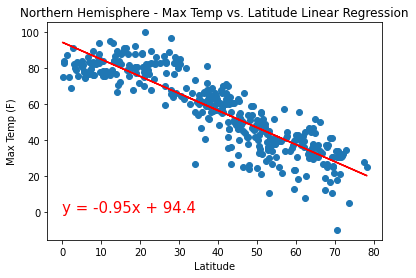

In [55]:
# Call an function #1
equation = linear_regression(n_hemisphere["Lat"], n_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print("There is a strong negative correlation between teperature and latitude in the Northern Hemisphere. The farther away fron the equator, the colder it becomes.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.73
There is a strong positive correlation between temperature and latitude in thesouthern hemisphere. The nearer to the        equator, the warmer it becomes.


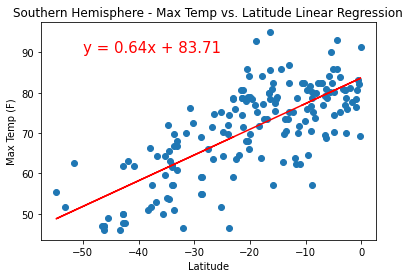

In [58]:
# Call an function #1
equation = linear_regression(s_hemisphere["Lat"], s_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -50, 90)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print("There is a strong positive correlation between temperature and latitude in thesouthern hemisphere. The nearer to the        equator, the warmer it becomes.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.16
There is weak positive correlation between humidity and latitude in northern hemisphere. Humidity may increase slighly the farther away from the equator.


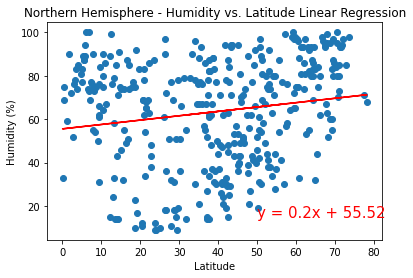

In [59]:
# Call an function #1
equation = linear_regression(n_hemisphere["Lat"], n_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 50, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
print("There is weak positive correlation between humidity and latitude in northern hemisphere. Humidity may increase slighly the farther away from the equator.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.05
There is very weak correlation between humidity and latitude in southern hemisphere.


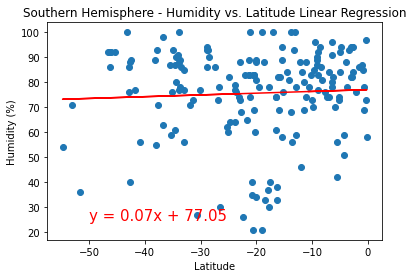

In [60]:
# Call an function #1
equation = linear_regression(s_hemisphere["Lat"], s_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -50, 25)

# Set a title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Sounthern Hemisphere - Humidity vs. Latitude Linear Regression.png")
print("There is very weak correlation between humidity and latitude in southern hemisphere.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.13
There is a weak positive correlation in this graph.


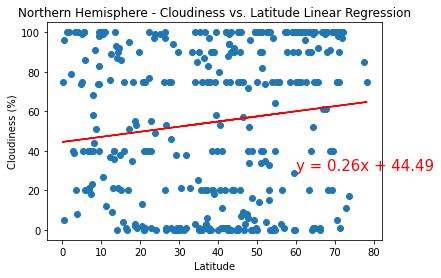

In [62]:
# Call an function #1
equation = linear_regression(n_hemisphere["Lat"], n_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 60, 30)

# Set a title
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
print("There is a weak positive correlation in this graph.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.05


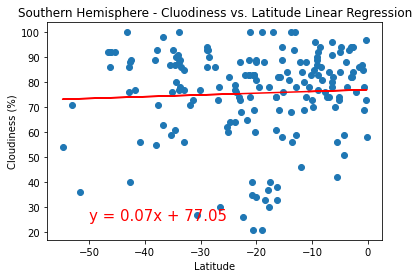

In [61]:
# Call an function #1
equation = linear_regression(s_hemisphere["Lat"], s_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -50, 25)

# Set a title
plt.title("Southern Hemisphere - Cluodiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.04


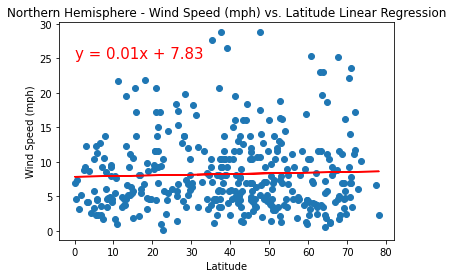

In [49]:
# Call an function #1
equation = linear_regression(n_hemisphere["Lat"], n_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 0, 25)

# Set a title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.05


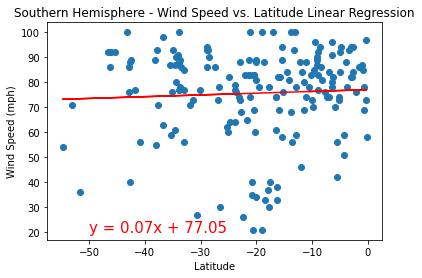

In [52]:
# Call an function #1
equation = linear_regression(s_hemisphere["Lat"], s_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -50, 20)

# Set a title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")